In [12]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [13]:
file_path = "/mnt/c/hotelbooking/hotelbooking.csv"
data_frame = pandas.read_csv(file_path)
print(f"The dataset contains {data_frame.shape[1]} features, {data_frame.shape[1] - 1} if booking status is considered as a target value")
data_frame.head(10)

The dataset contains 17 features, 16 if booking status is considered as a target value


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [14]:
statistical_summary = data_frame.describe()
highest_mean = (statistical_summary.loc['mean'].idxmax(), statistical_summary.loc['mean'].max())
print(statistical_summary)
print(f"The feature with the highest mean is '{highest_mean[0]}' with a mean value of {highest_mean[1]}.")

       number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.0000

In [15]:
# Finds Null values and sums the total for all columns
missing_values = data_frame.isnull().sum()
# Returns all columns with 1+ missing value
columns_with_missing_vals = missing_values[missing_values > 0]
if columns_with_missing_vals.empty:
    print("There are no columns with missing values!")
else:
    print(columns_with_missing_vals)

There are no columns with missing values!


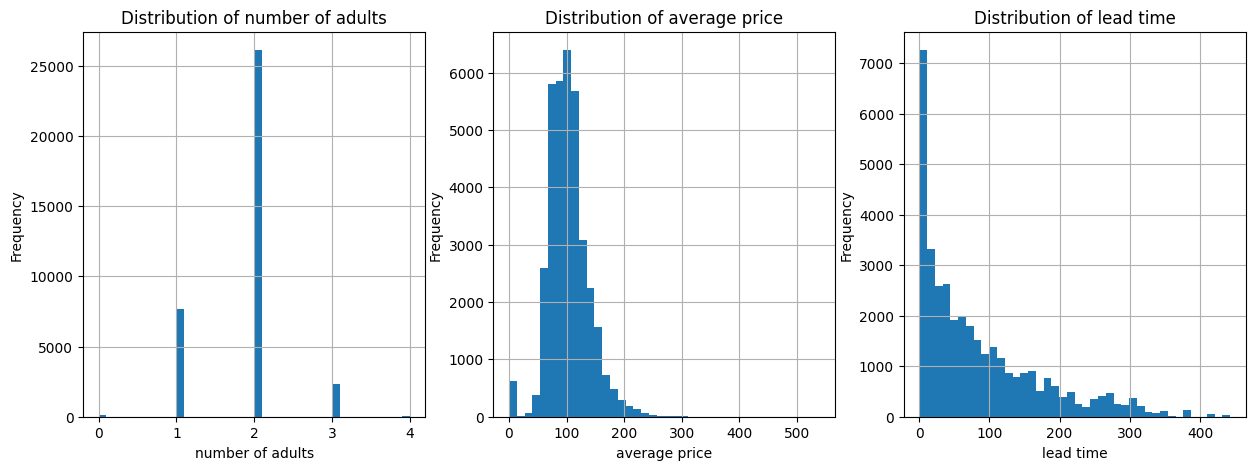

In [16]:
features = ['number of adults', 'average price', 'lead time']
plt.figure(figsize=(15, 5))

for i in range(len(features)):
    # Creates sub graphs
    plt.subplot(1, 3, i + 1)
    # Adds histogram to plot
    data_frame[features[i]].hist(bins=40)
    plt.title(f'Distribution of {features[i]}')
    plt.xlabel(features[i])
    plt.ylabel('Frequency')

plt.show()

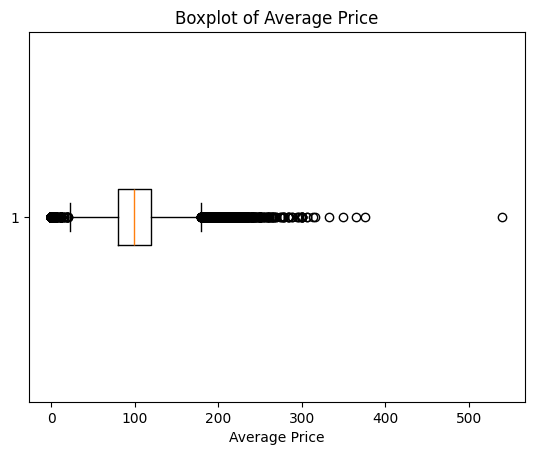

In [17]:
plt.figure()
plt.boxplot(data_frame['average price'], vert=False)
plt.title('Boxplot of Average Price')
plt.xlabel('Average Price')
plt.show()
# There are outliers on both the high and low side of the average price feature. 
# There are more outliers on the higher end of the price range, including some extreme outliers. 

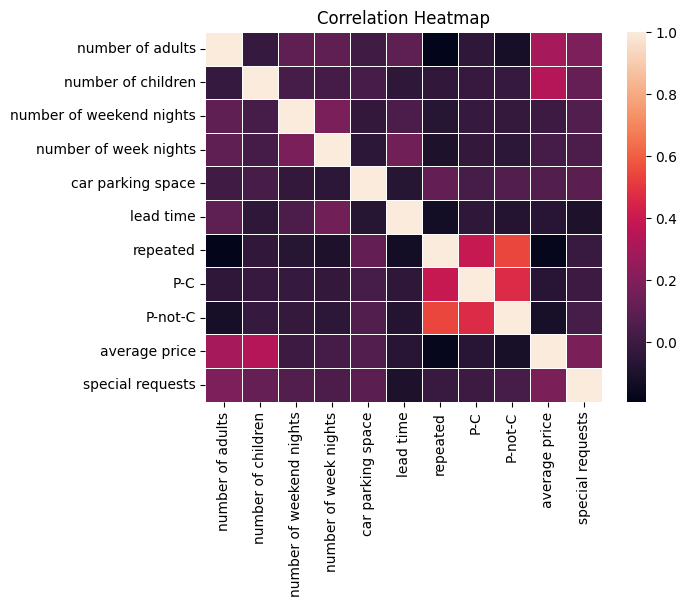

In [18]:
numerical_data = data_frame.select_dtypes(include=['float64', 'int64'])

# Creates a correlation matrix
correlation_matrix = numerical_data.corr()
plt.figure()
# Uses a heatmap to display the data from the correlation matrix
sns.heatmap(correlation_matrix, linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()

In [19]:
data_frame['total nights'] = data_frame['number of weekend nights'] + data_frame['number of week nights']
data_frame[['number of weekend nights', 'number of week nights', 'total nights']].head(5)

,number of weekend nights,number of week nights,total nights
0,2,5,7
1,1,3,4
2,1,3,4
3,0,2,2
4,1,2,3


In [38]:
# QUESTION 2:
features = ['number of adults', 'average price', 'total nights', 'type of meal', 'room type']

x = data_frame[features]
y = data_frame['booking status']

# Converts the two categorical features to numeric using one-hot encoding
x = pandas.get_dummies(x, columns=['type of meal', 'room type'])

# Seperates the data into 80% training 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Initiates and trains the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

# Creates a prediction on test data and compares to the true labels
y_prediction = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_prediction)

print(f'The accuracy of the Decision Tree classifier is {accuracy:.2f}')

The accuracy of the Decision Tree classifier is 0.73


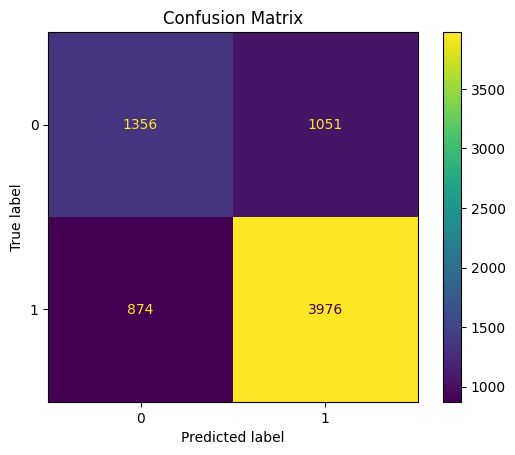

In [39]:
c_matrix = confusion_matrix(y_test, y_prediction)
ConfusionMatrixDisplay(c_matrix).plot()
plt.title("Confusion Matrix")
plt.show()

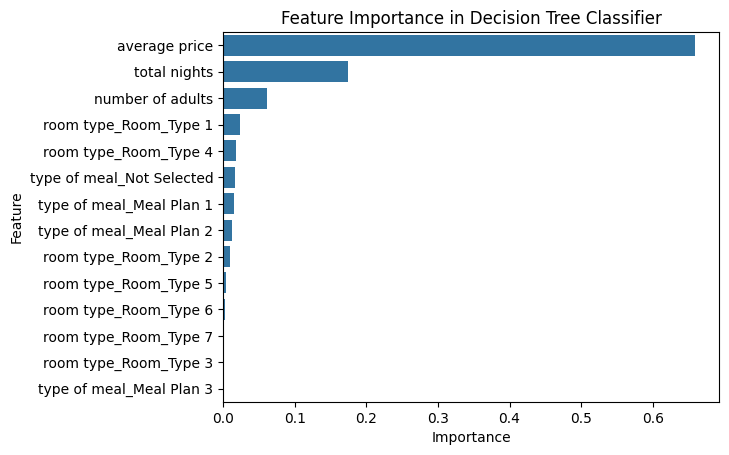

                      Feature  Importance
1               average price    0.659454
2                total nights    0.174848
0            number of adults    0.061627
7       room type_Room_Type 1    0.023920
10      room type_Room_Type 4    0.018543
6   type of meal_Not Selected    0.016610
3    type of meal_Meal Plan 1    0.014934
4    type of meal_Meal Plan 2    0.012127
8       room type_Room_Type 2    0.010140
11      room type_Room_Type 5    0.003711
12      room type_Room_Type 6    0.002586
13      room type_Room_Type 7    0.001015
9       room type_Room_Type 3    0.000274
5    type of meal_Meal Plan 3    0.000211
The most important feature for making predictions is average price


In [41]:
# Creates a list of the importance for each feature
importance = classifier.feature_importances_
features = x.columns

# Creates a DataFrame that displays feature importance
importance_df = pandas.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure()
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()
print(importance_df)
print(f'The most important feature for making predictions is {importance_df.iloc[0]["Feature"]}')